# Naive Bayes

Naive Bayes uses Bayes Theorem to find out the best hypothesis given data. Bayes Theorem states:
$$P\left(X \ | \ Y\right)=\frac{P\left(Y \ | \ X\right)\cdot P\left(X\right)}{P\left(Y\right)}$$

Where,

1. P(X|Y) is the posterior probability
2. P(Y|X) is the probability assuming that the hypothesis were true. 
3. P(X) is the prior probability which is irrespective of data. 
4. P(Y) is probability of the data, irrespective of hypothesis. 

Once we have these probabilities, in the end we choose the hypothesis with the maximum probability. This is also called as __Maximum A Posteriori (MAP) Estimation__

### Naive Bayes is called "Naive" ?

Naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 4" in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier considers all of these properties to independently contribute to the probability that this fruit is an apple.

While calculating P(Y|X) we simply multiply the terms, eg P(Y0, Y1, Y2 | X) = P(Y0|X) \* P(Y1|X) \* P(Y2|X). Here we assume independce between Y0, Y1 etc. which may or may not be true. 

## Gaussian Naive Bayes

While calculating P(Y|X) we assume the features are categorical, so we can count things. But if there are real valued numbers, we instead take the pdf of the number. We fit a gaussian to the given dataset and take it's pdf instead of P(Y|X)

$$P\left(X \ | \ Y\right)=\frac{PDF\left(Y \ \vert \ X \right)\cdot P\left(X\right)}{PDF\left(Y\right)}$$

### Generative vs Discriminative Model

Genrative models: they try to mimic the underlying process which generated the dataset. 

Disriminative models: these models don't have anything with how the data is generated, they will simply classify things. 

For more read: https://stackoverflow.com/a/879591/1878563

Naive Bayes is a discriminative model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Ambil Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Praktikum 2/iris_species.csv')
X = df.iloc[:, 1:3].values
y = df.iloc[:, -1].values

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

In [6]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

## Proses Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Report Hasil Data Train

Text(0.5, 1.0, 'Confusion Matrix')

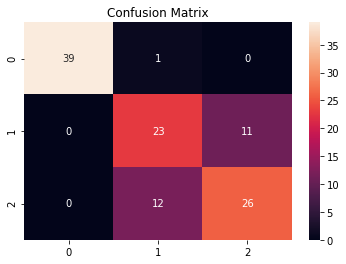

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_train.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.97      0.99        40
Iris-versicolor       0.64      0.68      0.66        34
 Iris-virginica       0.70      0.68      0.69        38

       accuracy                           0.79       112
      macro avg       0.78      0.78      0.78       112
   weighted avg       0.79      0.79      0.79       112



## Report Hasil Data Test

Text(0.5, 1.0, 'Confusion Matrix')

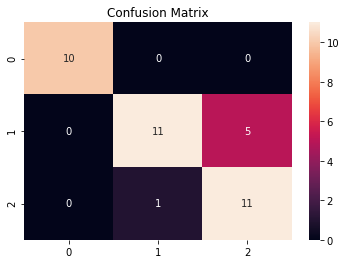

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test.ravel(), y_pred.ravel(), target_names=np.unique(df.iloc[:, -1].values)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      0.69      0.79        16
 Iris-virginica       0.69      0.92      0.79        12

       accuracy                           0.84        38
      macro avg       0.87      0.87      0.86        38
   weighted avg       0.87      0.84      0.84        38



## Plot Decision Boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


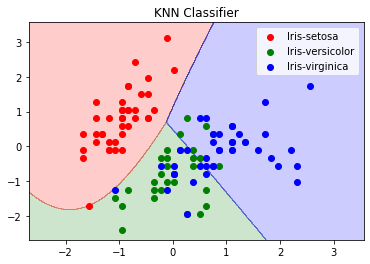

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.2, cmap=ListedColormap(('red', 'green','blue')))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c=ListedColormap(('red', 'green','blue'))(i), label=np.unique(df.iloc[:, -1].values)[j])
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('KNN Classifier')
plt.legend()
plt.show()